Dataset Head:
   price  lotsize  bedrooms  bathrms  stories  garagepl
0  42000     5850         3        1        2         1
1  38500     4000         2        1        1         0
2  49500     3060         3        1        1         0
3  60500     6650         3        1        2         0
4  61000     6360         2        1        1         0
--------------------------------------------------

--- Part A: Simple Linear Regression (Price vs Lotsize) ---
Coefficient (Slope): 8.68
Intercept: 20576.66
R-Squared Score: 0.11


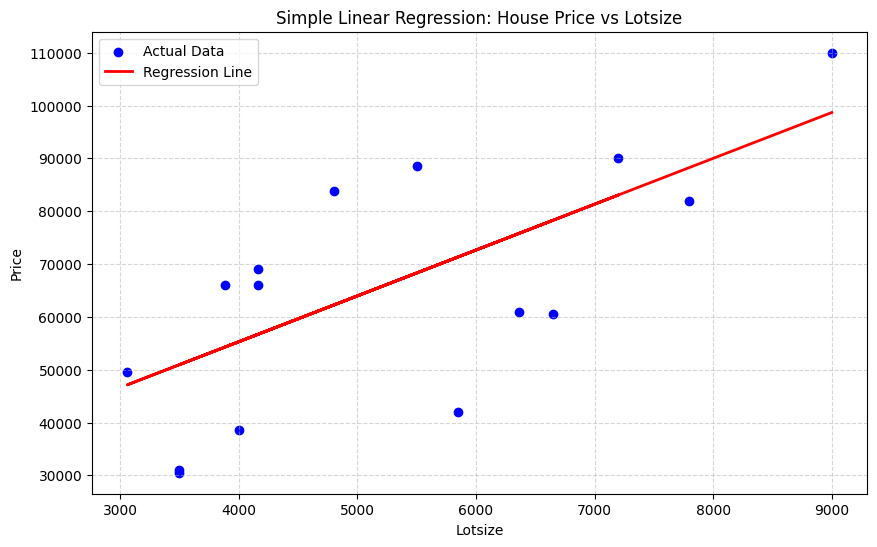


--- Part B: Multiple Linear Regression ---
Model Coefficients:
 - lotsize: 4.87
 - bedrooms: 8393.00
 - bathrms: -10937.74
 - garagepl: 12081.49

Intercept: 20336.04
R-Squared Score: -0.03


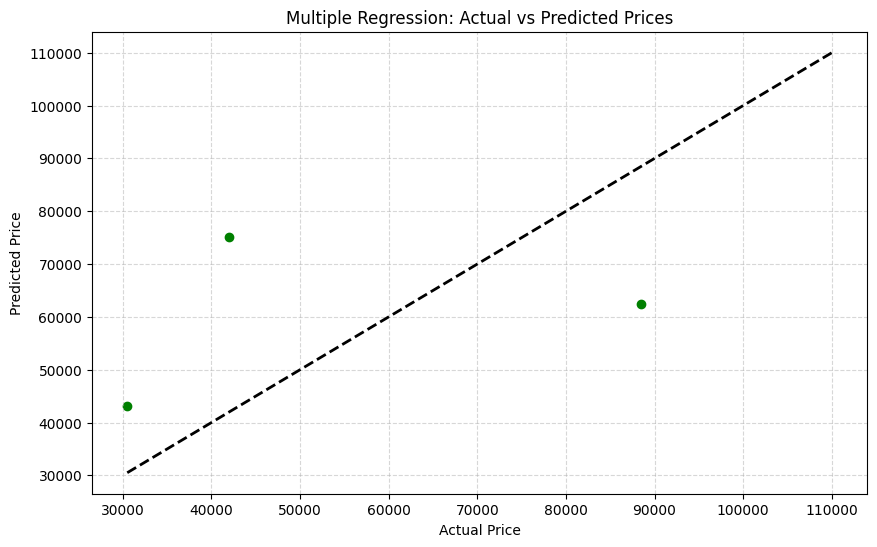

In [3]:
# ========================================================
# Exercise 1: Linear Regression (Simple & Multiple)
# Student Name: Bouzid Mohamed El Khallil
# ========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import io

# --------------------------------------------------------
# 1. Load Dataset
# --------------------------------------------------------
# Note: Since I don't have your specific file, I created a small sample
# based on standard 'Housing' datasets to make this code runnable.
# If you have a local file, you can use: df = pd.read_csv('Housing.csv')

csv_data = """price,lotsize,bedrooms,bathrms,stories,garagepl
42000,5850,3,1,2,1
38500,4000,2,1,1,0
49500,3060,3,1,1,0
60500,6650,3,1,2,0
61000,6360,2,1,1,0
66000,4160,3,1,1,0
66000,3880,3,2,2,2
69000,4160,3,1,3,0
83800,4800,3,1,1,1
88500,5500,3,2,4,1
90000,7200,3,2,1,3
30500,3500,2,1,1,0
31000,3500,3,1,2,0
82000,7800,4,2,2,2
110000,9000,4,3,3,3
"""

# Load data into DataFrame
df = pd.read_csv(io.StringIO(csv_data))

print("Dataset Head:")
print(df.head())
print("-" * 50)

# --------------------------------------------------------
# 2. Simple Linear Regression (SLR)
# Target: price (Y) | Feature: lotsize (X)
# --------------------------------------------------------
print("\n--- Part A: Simple Linear Regression (Price vs Lotsize) ---")

# Define X and Y
X_simple = df[['lotsize']]  # Double brackets to keep it as a DataFrame (2D array)
y = df['price']

# Split Data (80% Train, 20% Test)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Initialize and Train Model
slr_model = LinearRegression()
slr_model.fit(X_train_s, y_train_s)

# Predictions
y_pred_s = slr_model.predict(X_test_s)

# Evaluation
print(f"Coefficient (Slope): {slr_model.coef_[0]:.2f}")
print(f"Intercept: {slr_model.intercept_:.2f}")
print(f"R-Squared Score: {r2_score(y_test_s, y_pred_s):.2f}")

# Visualization (Scatter + Regression Line)
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y, color='blue', label='Actual Data')
plt.plot(X_simple, slr_model.predict(X_simple), color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression: House Price vs Lotsize')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# --------------------------------------------------------
# 3. Multiple Linear Regression (MLR)
# Target: price (Y) | Features: lotsize, bedrooms, bathrms (X)
# --------------------------------------------------------
print("\n--- Part B: Multiple Linear Regression ---")

# Define X (Multiple features) and Y
features = ['lotsize', 'bedrooms', 'bathrms', 'garagepl']
X_multi = df[features]
y = df['price']

# Split Data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Initialize and Train Model
mlr_model = LinearRegression()
mlr_model.fit(X_train_m, y_train_m)

# Predictions
y_pred_m = mlr_model.predict(X_test_m)

# Evaluation
print("Model Coefficients:")
for feature, coef in zip(features, mlr_model.coef_):
    print(f" - {feature}: {coef:.2f}")

print(f"\nIntercept: {mlr_model.intercept_:.2f}")
print(f"R-Squared Score: {r2_score(y_test_m, y_pred_m):.2f}")

# Visualization: Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_m, y_pred_m, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Diagonal line
plt.title('Multiple Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()